In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import glob
from astropy.io.fits import getdata, getheader

In [59]:
# Setup NuSTAR time epochs:
launch_met=77241600. # 2012-06-13T00:00:00

from astropy.convolution import convolve, Box1DKernel


In [220]:
spec = np.zeros([6, 4096])
exp = np.zeros(6)
for ind, file in enumerate(glob.glob('../full_mission/*A_02*')):
    evdata = getdata(file, 1)
    hdr= getheader(file, 1)
    epoch = evdata['TIME'].min()
    dt_years = (epoch-launch_met) / 3.154e7 # years
    
    epoch_ind = np.int(np.floor(dt_years))

    # Just take DET0 and GRADE==0 for now:
    filter = ( (evdata['GRADE']==0) & (evdata['DET_ID']==0) )
    inds = filter.nonzero()
    
    ehist, edges = np.histogram(evdata['PI'][inds[0]], range = [0, 4096],
                       bins=4096)
    spec[epoch_ind, :]+=ehist
    exp[epoch_ind] += np.float(hdr['EXPOSURE'])
    


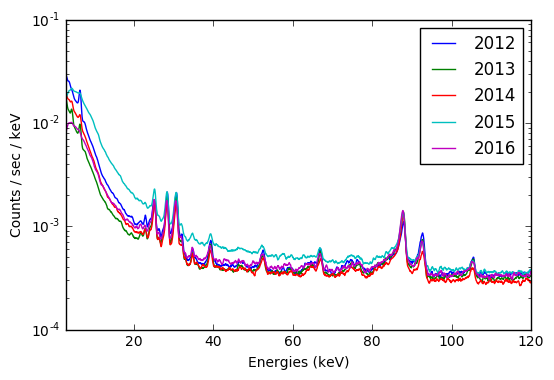

In [226]:
energies = np.arange(4096) * 0.04 + 1.6
smt_size=12
for ind in np.arange(len(spec[:, 0])):
    if(exp[ind] == 0):
        continue
    
    pltspec = convolve(spec[ind, :],Box1DKernel(smt_size))/(0.04*exp[ind])
    if(ind==0):
        inrange = (energies>125) * (energies <140)
        scale = pltspec[inrange.nonzero()].sum()
        
        # If you want to scale over some energy range, do that here...
#    pltspec *= scale / pltspec[inrange.nonzero()].sum() 
    plt.semilogy(energies[0:4096], pltspec ,
                label=str(2012+ind))
                 
plt.ylabel('Counts / sec / keV')
plt.xlabel('Energies (keV)')
plt.xlim(3, 120)
#plt.ylim(4e-4, 0.9e-3)
plt.legend()
plt.show()
